<a href="https://colab.research.google.com/github/KatherineValerio/FinalProject/blob/main/finalprojectv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


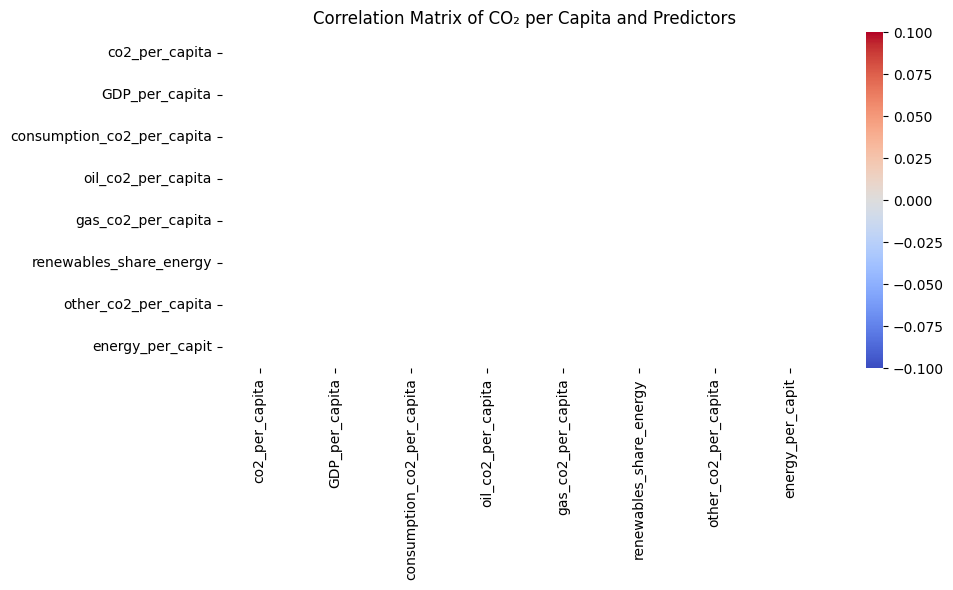

GDP_per_capita: R² = nan
consumption_co2_per_capita: R² = nan
oil_co2_per_capita: R² = nan
gas_co2_per_capita: R² = nan
renewables_share_energy: R² = nan
other_co2_per_capita: R² = nan
energy_per_capit: R² = nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step 1: Load datasets
co2_data = pd.read_csv("/content/drive/MyDrive/owid-co2-data.csv")
gdp_data = pd.read_csv("/content/drive/MyDrive/gdp-per-capita-worldbank.csv")  # Replace with actual file
energy_data = pd.read_csv("/content/drive/MyDrive/owid-energy-data.csv")  # Replace with actual file

#rename columns
gdp_data = gdp_data.rename(columns={"Entity": "country",
                                    "Year": "year",
                                    "GDP per capita, PPP (constant 2021 international $)":"GDP_per_capita"})

energy_data = energy_data.rename(columns={"energy_per_capita":"energy_per_capit"})


# Step 2: Merge datasets on country and year
df = co2_data.merge(gdp_data, on=["country", "year"]).merge(energy_data, on=["country", "year"])

# Filter to the most recent year available per country
latest_years = df.groupby("country")["year"].transform("max")
df_latest = df[df["year"] == latest_years].copy()

# Select relevant features
columns_of_interest = [
    "co2_per_capita",
    "GDP_per_capita",
    "consumption_co2_per_capita",
    "oil_co2_per_capita",
    "gas_co2_per_capita",
    "renewables_share_energy",
    "other_co2_per_capita",  # if available
    "energy_per_capit"
]

df_selected = df_latest[columns_of_interest].dropna().copy()

plt.figure(figsize=(10, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of CO₂ per Capita and Predictors")
plt.tight_layout()
plt.show()

def run_linear_regression(df, predictor, target='co2_per_capita'):
    model = LinearRegression()
    X = df[[predictor]]
    y = df[target]
    model.fit(X, y)
    r_squared = model.score(X, y)
    return r_squared

results = {}
for predictor in df_selected.columns:
    if predictor != 'co2_per_capita':
        score = run_linear_regression(df_selected, predictor)
        results[predictor] = score

# Sort by highest R² score
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for feature, r2 in sorted_results:
    print(f"{feature}: R² = {r2:.2f}")